In [1]:
import pandas as pd
import matplotlib
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = [12.0,8.0]
from pandas import to_datetime
from pandas import DataFrame
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
from prophet import Prophet
from sklearn.metrics import mean_absolute_error
from matplotlib import pyplot

Importing plotly failed. Interactive plots will not work.


In [2]:
!pwd


/Users/olawaleoluwole/Desktop/OC forecasting


In [3]:
#read the data 
df = pd.read_csv('international-airline-passengers.csv')
df.head()

,Month,International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0


In [4]:
#rename the column name
df = df.rename(columns = {'International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60': 'Passengers'})

In [5]:
#check the first 5rows
df.head()

,Month,Passengers
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0


In [6]:
#change data(Passenger) format
pd.options.display.float_format = '{:,.0f}'.format
df.head()

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [7]:
#checking missing data
print(df.isnull().sum())

Month         0
Passengers    1
dtype: int64


In [8]:
#drop missing data
df = df.dropna()
print(df.isnull().sum())

Month         0
Passengers    0
dtype: int64


In [9]:
#checking columns 
df.columns

Index(['Month', 'Passengers'], dtype='object')

In [10]:
#checking data types
df.dtypes

Month          object
Passengers    float64
dtype: object

In [11]:
#checking shape of df
df.shape

(144, 2)

In [12]:
#creating copy of df
df1 = df.copy()

In [13]:
#converting Month column to date time
df1['Month'] = pd.DatetimeIndex(df1['Month']) 
df1.head()

,Month,Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [14]:
#set Month as index
df1 = df1.set_index('Month')
df1.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


<AxesSubplot:xlabel='Month'>

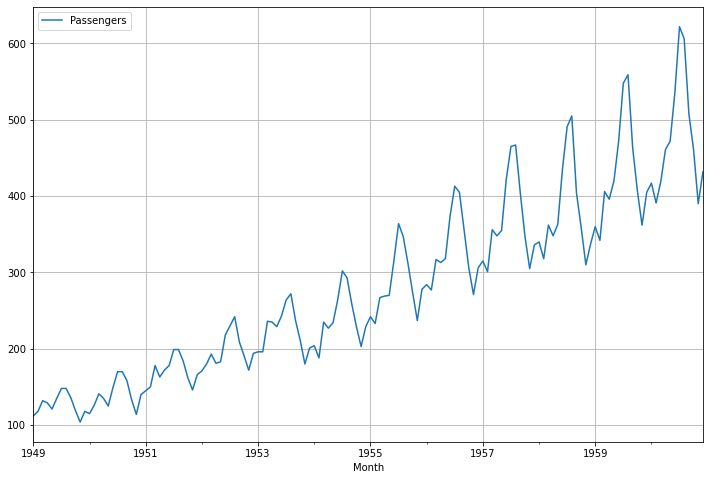

In [15]:
#
df1.plot(grid=True)

It is a standard univariate time series dataset that contains both a trend and seasonality,we observe from the plot that as years goes up the number of passengers increase, we could see peaks which could subject to trends. We are going to build a forecasting model to predict both in-sample and out-sample forecast.

<AxesSubplot:xlabel='Passengers'>

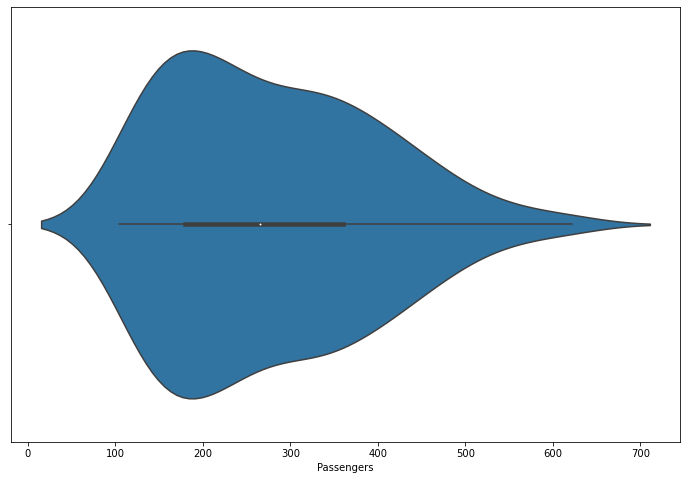

In [16]:
#Checking for outliers in our dataset
import seaborn as sns
sns.violinplot(x=df1['Passengers'])

In the plot above we try to check if we have an outliers in our dataset, and from the plot no outliers were detected. 

# Make an in-sample forecast

We can generate predictions based on the input data used for training the model. Ideally, if the model has encountered the data during training, it should yield accurate predictions. However, in practice, the model attempts to generalize across all instances in the data, leading to imperfect predictions. This process is referred to as making an in-sample forecast (within the training set), and analyzing the outcomes provides valuable insights into the model's performance—essentially, how effectively it has grasped the patterns within the training data.

In [17]:
#import our prophet model
from prophet import Prophet

In [18]:
#generate a train data from our original data
X_train = df.copy()

In [19]:
X_train.head()

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [20]:
#prepare expected column names for prophet model
X_train.rename(columns={"Month": "ds", "Passengers": "y"}, inplace=True)

In [21]:
X_train.head()

,ds,y
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [22]:
#define model model 
model_prophet = Prophet()
#fit the model
model_prophet.fit(X_train)

12:46:17 - cmdstanpy - INFO - Chain [1] start processing
12:46:17 - cmdstanpy - INFO - Chain [1] done processing


In [23]:
# use the model to make a forecast
train_forecast = model_prophet.predict(X_train)

In [24]:
train_forecast.shape

(144, 16)

In [25]:
train_forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1949-01-01,107,58,113,107,107,-21,-21,-21,-21,-21,-21,0,0,0,86
1,1949-02-01,109,51,107,109,109,-30,-30,-30,-30,-30,-30,0,0,0,79
2,1949-03-01,111,83,139,111,111,-0,-0,-0,-0,-0,-0,0,0,0,111
3,1949-04-01,113,81,138,113,113,-5,-5,-5,-5,-5,-5,0,0,0,109
4,1949-05-01,116,85,142,116,116,-4,-4,-4,-4,-4,-4,0,0,0,112


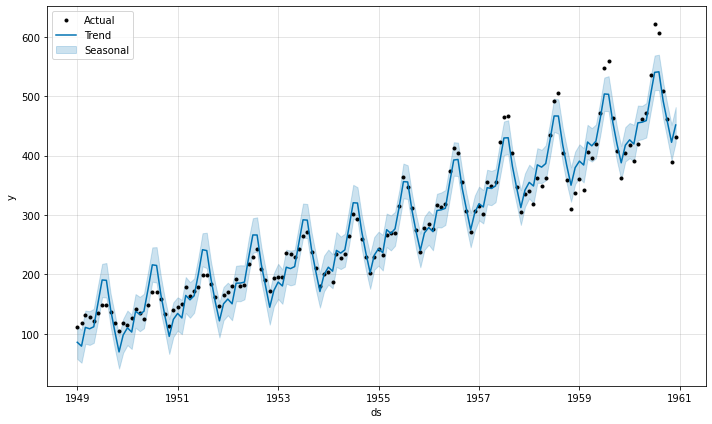

In [26]:
fig = model_prophet.plot(train_forecast)
plt.legend(['Actual', 'Trend', 'Seasonal'])
plt.show()

In [27]:
# Create a sample DataFrame
data = {'Actual': X_train['y'],'Prediction': train_forecast['yhat']}

new = pd.DataFrame(data)

In [28]:
new.head()

,Actual,Prediction
0,112,86
1,118,79
2,132,111
3,129,109
4,121,112


<AxesSubplot:>

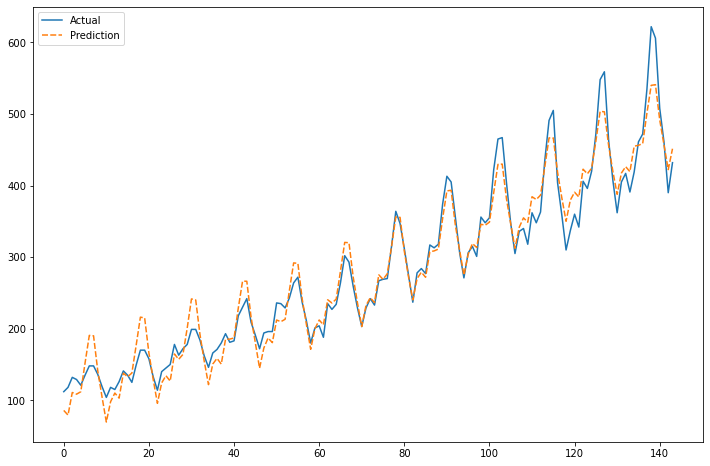

In [29]:
import seaborn as sns
sns.lineplot(data=new)

We can clearly see that our model captures the general trend of our training data quite well. Besides that, we can see up and down passenger numbers which are caused by the yearly trend. 

In [30]:
mae = mean_absolute_error(X_train['y'], train_forecast['yhat'])
print('MAE: %.3f' % mae)

MAE: 17.336


MAE=17.336 implies that, on average, the forecast's distance from the true value is 17.336, it also implies that, on average, the forecast's distance from the true value is 17% of the true value.

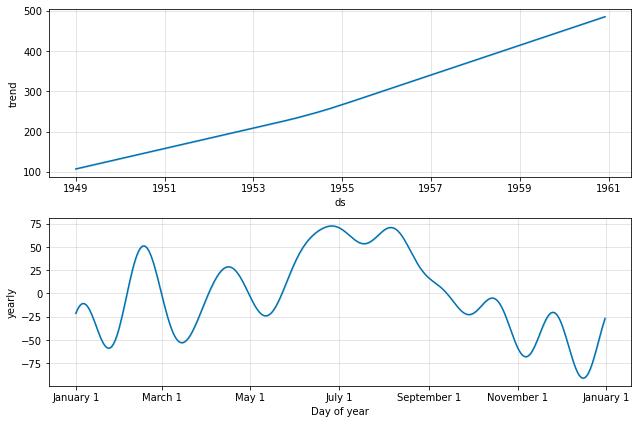

In [31]:
components = model_prophet.plot_components(train_forecast)

We can also see in the month of July that we have the highest numbers of passengers all through the years and January been lowest based on number of passengers. From the plots, the airline can know when to increase or lower the price of airline tickets to obtain a good margin.

# Out of Sample Forecast

In [32]:
new_forecast = model_prophet.make_future_dataframe(periods=365)

In [33]:
X_train.tail()

,ds,y
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390
143,1960-12,432


In [34]:
new_forecast.tail()

,ds
504,1961-11-27
505,1961-11-28
506,1961-11-29
507,1961-11-30
508,1961-12-01


In [35]:
X_train.shape

(144, 2)

In [36]:
new_forecast.shape

(509, 1)

In [37]:
# Python
forecast = model_prophet.predict(new_forecast)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
504,1961-11-27,500,469,528
505,1961-11-28,498,468,528
506,1961-11-29,496,466,525
507,1961-11-30,493,463,521
508,1961-12-01,489,461,519


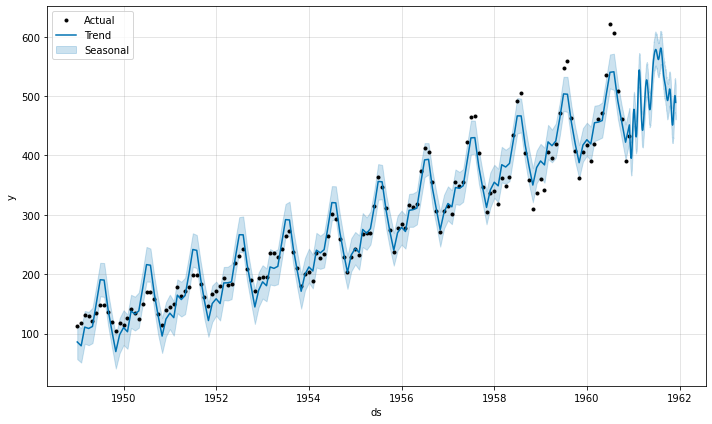

In [38]:
# Python
forecast_plot = model_prophet.plot(forecast)
plt.legend(['Actual', 'Trend', 'Seasonal'])
plt.show()

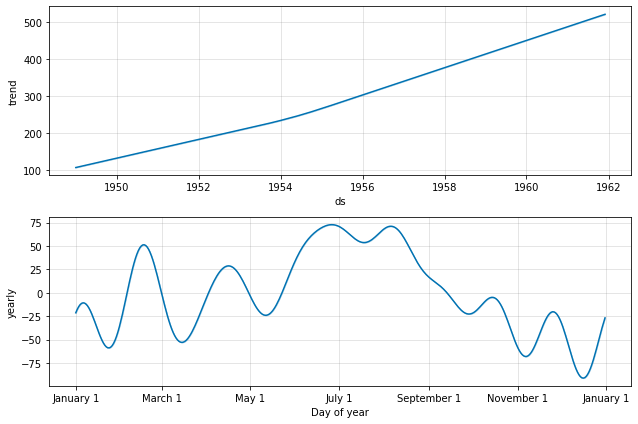

In [39]:
# 
forecast_components = model_prophet.plot_components(forecast)

# Evaluate our forecast model

In [40]:
X_train.head()

,ds,y
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [41]:
# create test dataset, remove last 12 months
train = X_train.drop(df.index[-12:])
print(train.tail())

          ds   y
127  1959-08 559
128  1959-09 463
129  1959-10 407
130  1959-11 362
131  1959-12 405


In [42]:
# define the model
model_eval = Prophet()
# fit the model
model_eval.fit(train)

12:46:19 - cmdstanpy - INFO - Chain [1] start processing
12:46:19 - cmdstanpy - INFO - Chain [1] done processing


In [43]:
# define the period for which we want a prediction
future_eval = list()
for i in range(1, 13):
 date = '1960-%02d' % i
 future_eval.append([date])
future_eval = DataFrame(future_eval)
future_eval.columns = ['ds']
future_eval['ds'] = to_datetime(future_eval['ds'])

In [44]:
future_eval

,ds
0,1960-01-01
1,1960-02-01
2,1960-03-01
3,1960-04-01
4,1960-05-01
5,1960-06-01
6,1960-07-01
7,1960-08-01
8,1960-09-01
9,1960-10-01


In [45]:
# use the model to make a forecast
forecast_eval = model_eval.predict(future_eval)
# calculate MAE between expected and predicted values for december
y_true_eval = X_train['y'][-12:].values
y_pred_eval = forecast_eval['yhat'].values
mae = mean_absolute_error(y_true_eval, y_pred_eval)
print('MAE: %.3f' % mae)

MAE: 33.448


In [46]:
y_true_eval

array([417., 391., 419., 461., 472., 535., 622., 606., 508., 461., 390.,
       432.])

In [47]:
y_pred_eval

array([424.80115307, 421.41753671, 456.93030164, 451.3096434 ,
       453.81895886, 493.66853054, 523.7425087 , 527.19401155,
       485.9820976 , 452.3313894 , 422.50491448, 447.77395511])

In [48]:
result = pd.DataFrame({"Actual": y_true_eval, "Prediction": y_pred_eval})
result.head()

,Actual,Prediction
0,417,425
1,391,421
2,419,457
3,461,451
4,472,454


In [49]:
forecast_eval.tail(12)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1960-01-01,447,399,450,447,447,-22,-22,-22,-22,-22,-22,0,0,0,425
1,1960-02-01,450,396,446,450,450,-29,-29,-29,-29,-29,-29,0,0,0,421
2,1960-03-01,453,431,483,453,453,4,4,4,4,4,4,0,0,0,457
3,1960-04-01,456,426,475,456,456,-5,-5,-5,-5,-5,-5,0,0,0,451
4,1960-05-01,459,429,482,459,459,-5,-5,-5,-5,-5,-5,0,0,0,454
5,1960-06-01,462,468,519,462,462,32,32,32,32,32,32,0,0,0,494
6,1960-07-01,465,500,549,465,465,59,59,59,59,59,59,0,0,0,524
7,1960-08-01,468,501,554,468,468,59,59,59,59,59,59,0,0,0,527
8,1960-09-01,471,460,511,471,471,15,15,15,15,15,15,0,0,0,486
9,1960-10-01,474,426,480,473,474,-21,-21,-21,-21,-21,-21,0,0,0,452


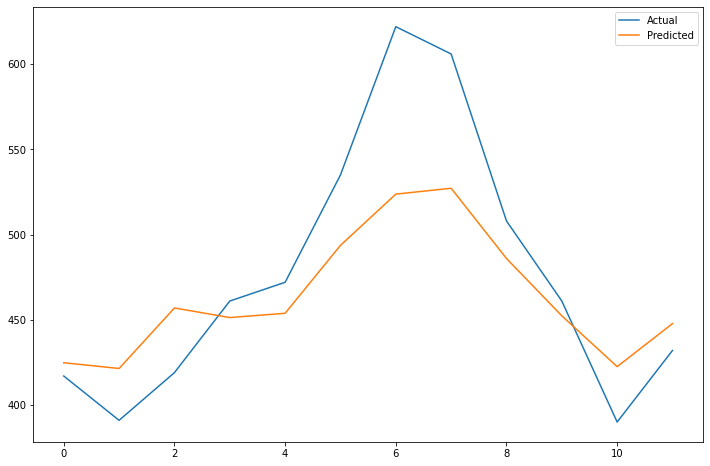

In [50]:
# plot expected vs actual
pyplot.plot(y_true_eval, label='Actual')
pyplot.plot(y_pred_eval, label='Predicted')
pyplot.legend()
pyplot.show()